The goal of this project is to figure out what the best chess opening is. There are a few things. While winning percentage is certainly an important one, it isn't the only parameter that is important to base our decision on. What good is knowing that you win 100 percent of the time play a strange opening if the likelihood of that opening is almost zero. Which brings me to my next point, we want to be looking at opening that people are going to be playing.  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D



In [2]:
df = pd.read_csv(r"C:\Users\PC\Desktop\Springboard Data Science Career Track\Springboard - github\DataScience Capstone 2\Capstone 2 - Adding Moves df", index_col=[0])   

In [3]:
df = df[['Event', 'White Elo', 'Black Elo', 'Result', 'Termination', 'Time Control', 'Opening',"Game URL", "White First Move", "Black First Move"]]      
df.head()

,Event,White Elo,Black Elo,Result,Termination,Time Control,Opening,Game URL,White First Move,Black First Move
0,Rated Blitz game,1429,1460,1-0,Normal,300+3,Sicilian Defense: Bowdler Attack,https://lichess.org/bVgQVZ7L,e4,c5
1,Rated Blitz game,1687,1647,1-0,Time forfeit,300+3,King's Pawn Game: Leonardis Variation,https://lichess.org/2ORvpVTt,e4,e5
2,Rated Blitz game,1778,1837,1-0,Normal,300+3,Queen's Gambit Declined: Neo-Orthodox Variatio...,https://lichess.org/rNNyi2Xh,d4,d5
3,Rated Blitz game,1101,1086,0-1,Normal,300+3,Queen's Gambit Declined: Marshall Defense,https://lichess.org/cLhZKY8t,d4,d5
4,Rated Blitz game,1362,1408,0-1,Normal,300+3,Sicilian Defense: Smith-Morra Gambit,https://lichess.org/aVEa6ISS,e4,c5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44332657 entries, 0 to 44332656
Data columns (total 10 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Event             object
 1   White Elo         int64 
 2   Black Elo         int64 
 3   Result            object
 4   Termination       object
 5   Time Control      object
 6   Opening           object
 7   Game URL          object
 8   White First Move  object
 9   Black First Move  object
dtypes: int64(2), object(8)
memory usage: 3.6+ GB


In [5]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,White Elo,Black Elo
count,44332657.00,44332657.00
mean,1654.47,1654.45
std,368.97,368.98
min,600.00,600.00
25%,1396.00,1395.00
50%,1674.00,1674.00
75%,1922.00,1922.00
max,3526.00,3553.00


The "count" value indicates that there are 44,332,657 records in the dataset for both white and black Elo ratings. 

The "mean" values indicate that the average Elo rating for both White and Black is approximately 1654.

The "std" values show that the standard deviation for both White and Black Elo ratings is approximately 369. 

The "min" and "max" values suggest that the range of Elo ratings for both white and black players is between 600 and 3526 for white players, and between 600 and 3553 for black players. 

In [6]:
# Count the number of games in each opening
df['Opening'].value_counts()

Queen's Pawn Game                                                            1078762
Modern Defense                                                                979663
Scandinavian Defense: Mieses-Kotroc Variation                                 892010
Philidor Defense                                                              864312
Queen's Pawn Game: Mason Variation                                            821382
                                                                              ...   
Sicilian Defense: Dragon Variation, Classical Variation, Stockholm Attack          1
King's Gambit Accepted: Australian Gambit                                          1
Scotch Game: Horwitz Attack, Blackburne Variation                                  1
Ponziani Opening: Ponziani Countergambit, Cordel Variation                         1
King's Gambit Accepted: Bishop's Gambit, McDonnell Attack                          1
Name: Opening, Length: 2954, dtype: int64

In [7]:
df['Opening'].value_counts(normalize=True).cumsum().head(100)

Queen's Pawn Game                                        0.024333
Modern Defense                                           0.046431
Scandinavian Defense: Mieses-Kotroc Variation            0.066552
Philidor Defense                                         0.086048
Queen's Pawn Game: Mason Variation                       0.104576
                                                           ...   
Caro-Kann Defense: Advance Variation, Short Variation    0.566439
Center Game: Normal Variation                            0.568604
Saragossa Opening                                        0.570767
Alekhine Defense                                         0.572917
Rat Defense: Small Center Defense                        0.575049
Name: Opening, Length: 100, dtype: float64

In [8]:
df[["Main Opening", "Sub Opening"]] = df["Opening"].str.split(":", expand=True)

In [9]:
df["Opening"].value_counts(normalize=True).cumsum().head(55)

Queen's Pawn Game                                0.024333
Modern Defense                                   0.046431
Scandinavian Defense: Mieses-Kotroc Variation    0.066552
Philidor Defense                                 0.086048
Queen's Pawn Game: Mason Variation               0.104576
Caro-Kann Defense                                0.123064
Van't Kruijs Opening                             0.137181
Horwitz Defense                                  0.150605
Pirc Defense                                     0.163758
French Defense: Knight Variation                 0.176370
Scandinavian Defense                             0.188145
Indian Defense                                   0.199810
Owen Defense                                     0.210725
Sicilian Defense: Bowdler Attack                 0.221587
Sicilian Defense: Old Sicilian                   0.231830
Scotch Game                                      0.241730
Queen's Pawn Game: Chigorin Variation            0.251221
Bishop's Openi

In [10]:
# Looking to keep roughly top 95% of openings played. 
mask = df["Opening"].isin(df["Opening"].value_counts(normalize=True).cumsum().head(55).index)
df = df[mask]

In [11]:
df.head()

,Event,White Elo,Black Elo,Result,Termination,Time Control,Opening,Game URL,White First Move,Black First Move,Main Opening,Sub Opening
0,Rated Blitz game,1429,1460,1-0,Normal,300+3,Sicilian Defense: Bowdler Attack,https://lichess.org/bVgQVZ7L,e4,c5,Sicilian Defense,Bowdler Attack
1,Rated Blitz game,1687,1647,1-0,Time forfeit,300+3,King's Pawn Game: Leonardis Variation,https://lichess.org/2ORvpVTt,e4,e5,King's Pawn Game,Leonardis Variation
3,Rated Blitz game,1101,1086,0-1,Normal,300+3,Queen's Gambit Declined: Marshall Defense,https://lichess.org/cLhZKY8t,d4,d5,Queen's Gambit Declined,Marshall Defense
4,Rated Blitz game,1362,1408,0-1,Normal,300+3,Sicilian Defense: Smith-Morra Gambit,https://lichess.org/aVEa6ISS,e4,c5,Sicilian Defense,Smith-Morra Gambit
7,Rated Blitz game,1887,1887,1-0,Time forfeit,300+3,Sicilian Defense: Smith-Morra Gambit,https://lichess.org/EXVNv52f,e4,c5,Sicilian Defense,Smith-Morra Gambit


In [12]:
df["White Won"] = df["Result"].str.replace(re.escape('1-0'), '1') \
                                                .str.replace(re.escape('0-1'), '0') \
                                                .str.replace(re.escape('1/2-1/2'), '.5') 


C:\Users\PC\AppData\Local\Temp\ipykernel_9844\2293494367.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["White Won"] = df["Result"].str.replace(re.escape('1-0'), '1') \


In [13]:
df.head()

,Event,White Elo,Black Elo,Result,Termination,Time Control,Opening,Game URL,White First Move,Black First Move,Main Opening,Sub Opening,White Won
0,Rated Blitz game,1429,1460,1-0,Normal,300+3,Sicilian Defense: Bowdler Attack,https://lichess.org/bVgQVZ7L,e4,c5,Sicilian Defense,Bowdler Attack,1
1,Rated Blitz game,1687,1647,1-0,Time forfeit,300+3,King's Pawn Game: Leonardis Variation,https://lichess.org/2ORvpVTt,e4,e5,King's Pawn Game,Leonardis Variation,1
3,Rated Blitz game,1101,1086,0-1,Normal,300+3,Queen's Gambit Declined: Marshall Defense,https://lichess.org/cLhZKY8t,d4,d5,Queen's Gambit Declined,Marshall Defense,0
4,Rated Blitz game,1362,1408,0-1,Normal,300+3,Sicilian Defense: Smith-Morra Gambit,https://lichess.org/aVEa6ISS,e4,c5,Sicilian Defense,Smith-Morra Gambit,0
7,Rated Blitz game,1887,1887,1-0,Time forfeit,300+3,Sicilian Defense: Smith-Morra Gambit,https://lichess.org/EXVNv52f,e4,c5,Sicilian Defense,Smith-Morra Gambit,1


In [14]:
df['Opening'] = df['Main Opening']
df['Opening Variation'] = df['Sub Opening']

df = df[['Event', 'White Elo', 'Black Elo', 'White Won', 'Termination', 'Time Control', 'Opening', 'Opening Variation', "White First Move", "Black First Move", "Game URL"]]      
df.head()

,Event,White Elo,Black Elo,White Won,Termination,Time Control,Opening,Opening Variation,White First Move,Black First Move,Game URL
0,Rated Blitz game,1429,1460,1,Normal,300+3,Sicilian Defense,Bowdler Attack,e4,c5,https://lichess.org/bVgQVZ7L
1,Rated Blitz game,1687,1647,1,Time forfeit,300+3,King's Pawn Game,Leonardis Variation,e4,e5,https://lichess.org/2ORvpVTt
3,Rated Blitz game,1101,1086,0,Normal,300+3,Queen's Gambit Declined,Marshall Defense,d4,d5,https://lichess.org/cLhZKY8t
4,Rated Blitz game,1362,1408,0,Normal,300+3,Sicilian Defense,Smith-Morra Gambit,e4,c5,https://lichess.org/aVEa6ISS
7,Rated Blitz game,1887,1887,1,Time forfeit,300+3,Sicilian Defense,Smith-Morra Gambit,e4,c5,https://lichess.org/EXVNv52f


In [15]:
df[["Time Control", "Time Control: Increment"]] = df["Time Control"].str.split("+", expand=True)

In [16]:
df.head()

,Event,White Elo,Black Elo,White Won,Termination,Time Control,Opening,Opening Variation,White First Move,Black First Move,Game URL,Time Control: Increment
0,Rated Blitz game,1429,1460,1,Normal,300,Sicilian Defense,Bowdler Attack,e4,c5,https://lichess.org/bVgQVZ7L,3
1,Rated Blitz game,1687,1647,1,Time forfeit,300,King's Pawn Game,Leonardis Variation,e4,e5,https://lichess.org/2ORvpVTt,3
3,Rated Blitz game,1101,1086,0,Normal,300,Queen's Gambit Declined,Marshall Defense,d4,d5,https://lichess.org/cLhZKY8t,3
4,Rated Blitz game,1362,1408,0,Normal,300,Sicilian Defense,Smith-Morra Gambit,e4,c5,https://lichess.org/aVEa6ISS,3
7,Rated Blitz game,1887,1887,1,Time forfeit,300,Sicilian Defense,Smith-Morra Gambit,e4,c5,https://lichess.org/EXVNv52f,3


In [17]:
print(df['Time Control'].value_counts())

180    11250025
300     8712216
240       53487
420       42227
360       21963
120        4054
Name: Time Control, dtype: int64


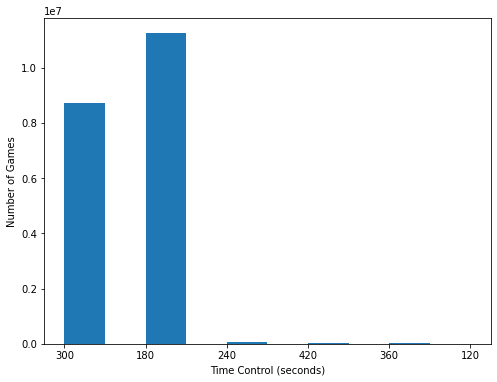

In [18]:
# Create a histogram of game lengths
plt.figure(figsize=(8,6))  # Increase the size of the figure
plt.hist(df['Time Control'])
plt.xlabel('Time Control (seconds)')
plt.ylabel('Number of Games')
plt.show()

In [19]:
df['Time Control: Increment'].value_counts()

0    14829932
2     3047296
3     2125283
1       47958
4       19217
5        9781
7        1883
8        1627
6         995
Name: Time Control: Increment, dtype: int64

In [20]:
df['White Won'].value_counts()

1     9943741
0     9300107
.5     840124
Name: White Won, dtype: int64

In [21]:
df2 = df.sample(10000)
print(df2.head())
print(df['White Won'].value_counts())

                     Event  White Elo  Black Elo White Won   Termination  \
17382619  Rated Blitz game       1828       1820         1        Normal   
15575384  Rated Blitz game       1119       1130         1        Normal   
18556381  Rated Blitz game       1780       1741         0  Time forfeit   
23297569  Rated Blitz game       1190       1196         0  Time forfeit   
16297353  Rated Blitz game       1364       1615         0        Normal   

         Time Control            Opening Opening Variation White First Move  \
17382619          300   Philidor Defense              None               e4   
15575384          180     Benoni Defense        Old Benoni               d4   
18556381          180  Queen's Pawn Game     London System               d4   
23297569          180   Sicilian Defense    Bowdler Attack               e4   
16297353          300       Owen Defense              None               e4   

         Black First Move                      Game URL  \
17382619 

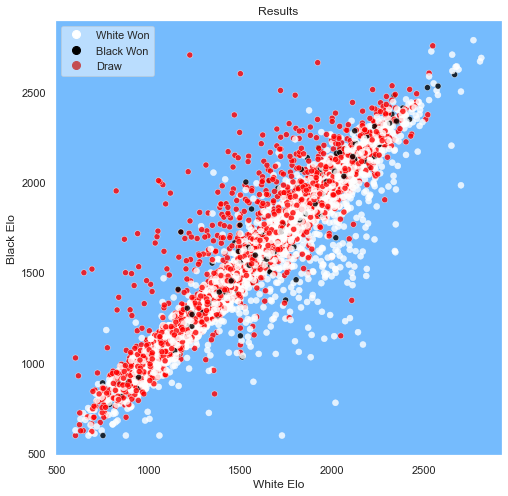

In [22]:
# Create a scatterplot of White Elo vs. Black Elo
plt.figure(figsize=(8,8))
sns.set(rc={'axes.facecolor':'xkcd:sky blue', 'figure.facecolor':'w'})
sns.scatterplot(x='White Elo', y='Black Elo', hue='White Won', data=df2, palette=['white', 'red', 'black'], alpha=.8)     

plt.xlabel('White Elo')
plt.ylabel('Black Elo')
plt.title('Results')
gray_patch = Line2D([0], [0], marker='o', color='w', label='White Won', markersize=8, ls='')
black_patch = Line2D([0], [0], marker='o', color='black', label='Black Won', markersize=8, ls='')
red_patch = Line2D([0], [0], marker='o', color='r', label='Draw', markersize=8, ls='')

plt.legend(handles=[gray_patch, black_patch, red_patch], facecolor='white', framealpha=.5)
plt.grid(False)
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_9844\1207106749.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


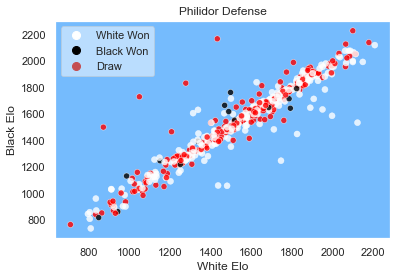

<Figure size 576x576 with 0 Axes>

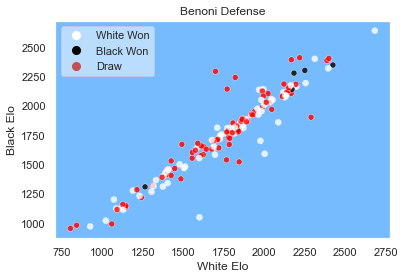

<Figure size 576x576 with 0 Axes>

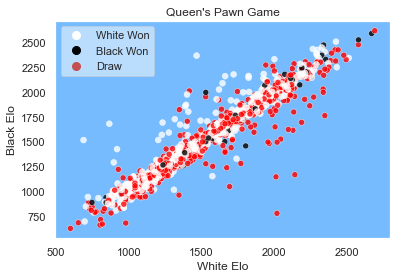

<Figure size 576x576 with 0 Axes>

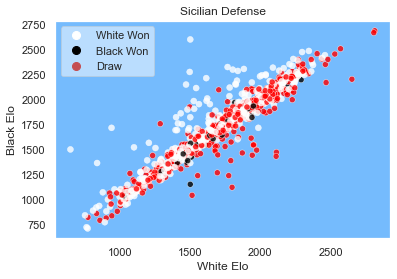

<Figure size 576x576 with 0 Axes>

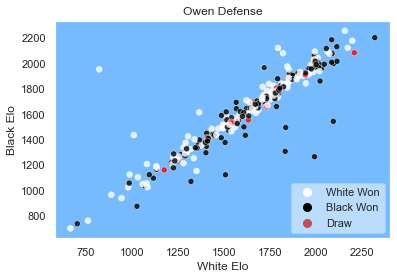

<Figure size 576x576 with 0 Axes>

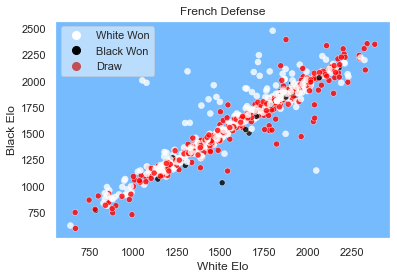

<Figure size 576x576 with 0 Axes>

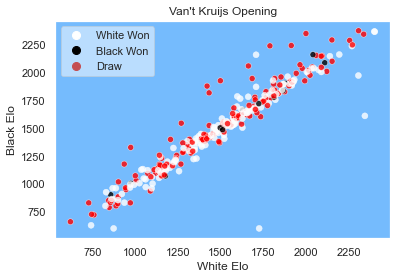

<Figure size 576x576 with 0 Axes>

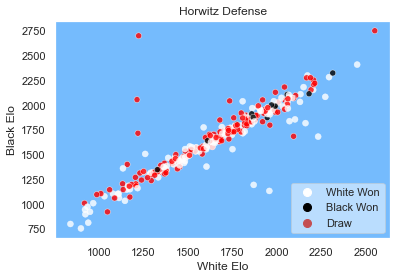

<Figure size 576x576 with 0 Axes>

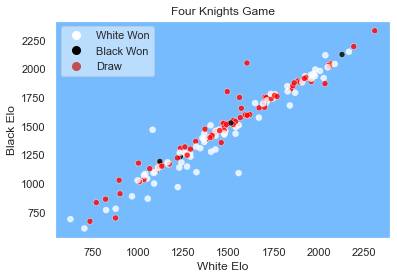

<Figure size 576x576 with 0 Axes>

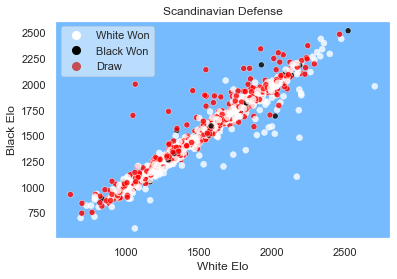

<Figure size 576x576 with 0 Axes>

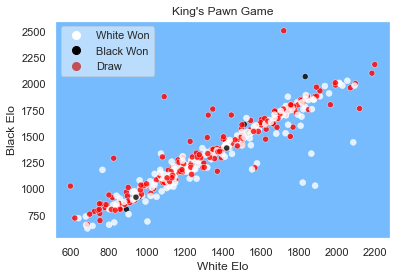

<Figure size 576x576 with 0 Axes>

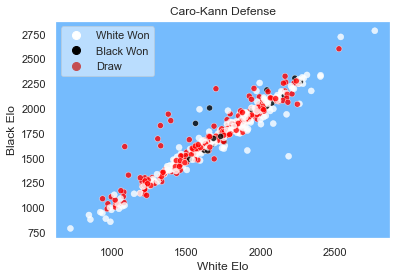

<Figure size 576x576 with 0 Axes>

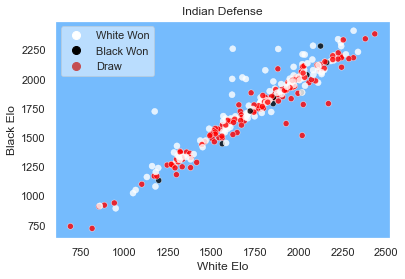

<Figure size 576x576 with 0 Axes>

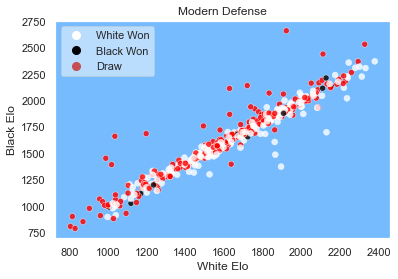

<Figure size 576x576 with 0 Axes>

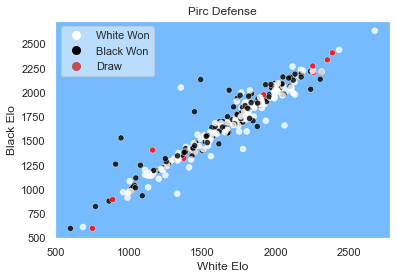

<Figure size 576x576 with 0 Axes>

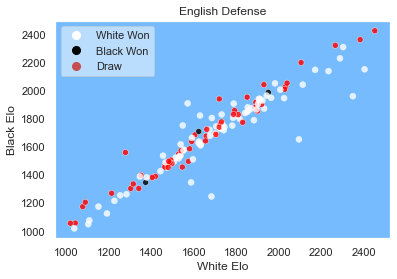

<Figure size 576x576 with 0 Axes>

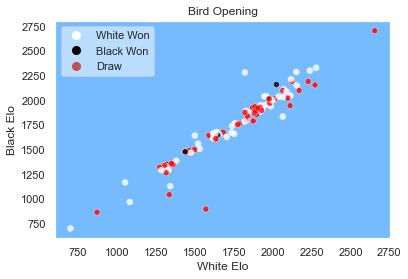

<Figure size 576x576 with 0 Axes>

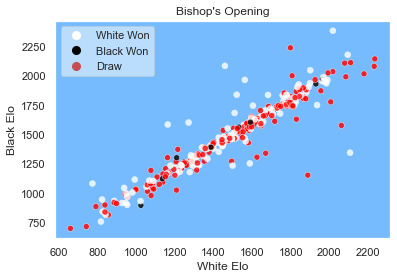

<Figure size 576x576 with 0 Axes>

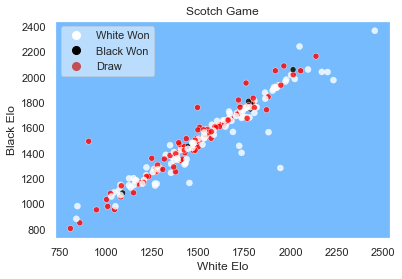

<Figure size 576x576 with 0 Axes>

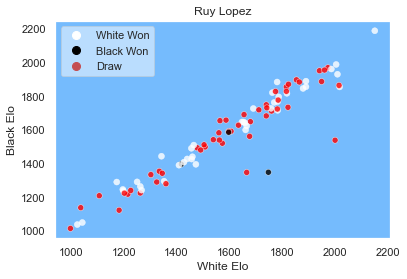

<Figure size 576x576 with 0 Axes>

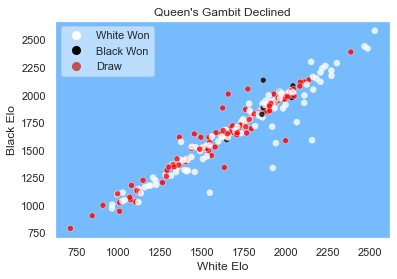

<Figure size 576x576 with 0 Axes>

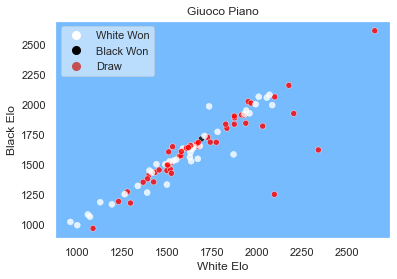

<Figure size 576x576 with 0 Axes>

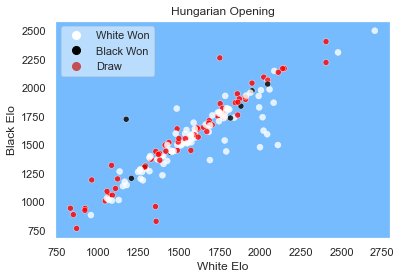

<Figure size 576x576 with 0 Axes>

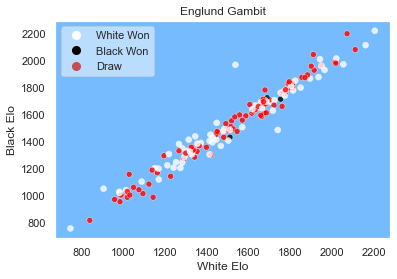

<Figure size 576x576 with 0 Axes>

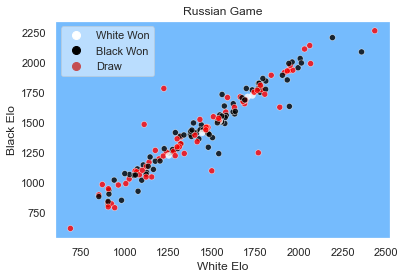

<Figure size 576x576 with 0 Axes>

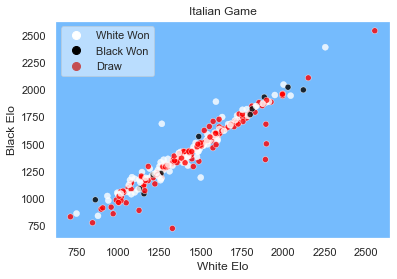

<Figure size 576x576 with 0 Axes>

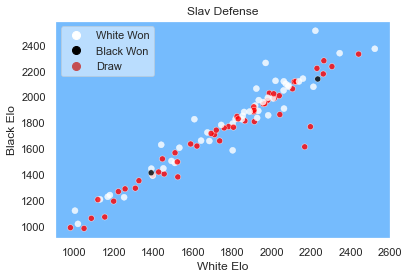

<Figure size 576x576 with 0 Axes>

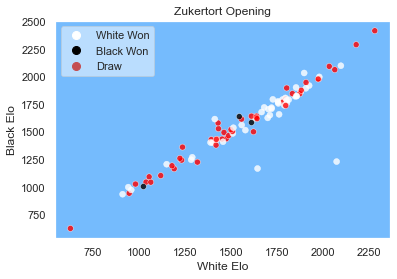

<Figure size 576x576 with 0 Axes>

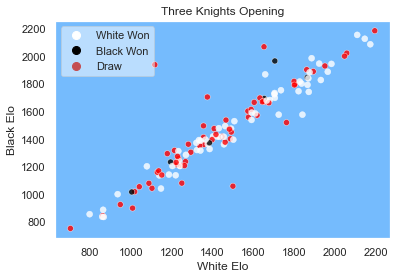

<Figure size 576x576 with 0 Axes>

In [23]:
# Get the unique values of Opening
openings = df2['Opening'].unique()

# Create a scatterplot for each value of Opening
for opening in openings:
    # Filter the dataframe to only include rows with the current value of Opening
    opening_df = df2[df2['Opening'] == opening]
    
    # Create the scatterplot
    

    plt.figure()
    sns.scatterplot(data=opening_df, x='White Elo', y='Black Elo', hue='White Won', palette=['white', 'red', 'black'], alpha=.8)
    plt.title(opening)
    plt.legend()

    gray_patch = Line2D([0], [0], marker='o', color='w', label='White Won', markersize=8, ls='')
    black_patch = Line2D([0], [0], marker='o', color='black', label='Black Won', markersize=8, ls='')
    red_patch = Line2D([0], [0], marker='o', color='r', label='Draw', markersize=8, ls='')

    plt.legend(handles=[gray_patch, black_patch, red_patch], facecolor='white', framealpha=.5)
    plt.grid(False)
    plt.figure(figsize=(8,8))
# Show the plots
plt.show()

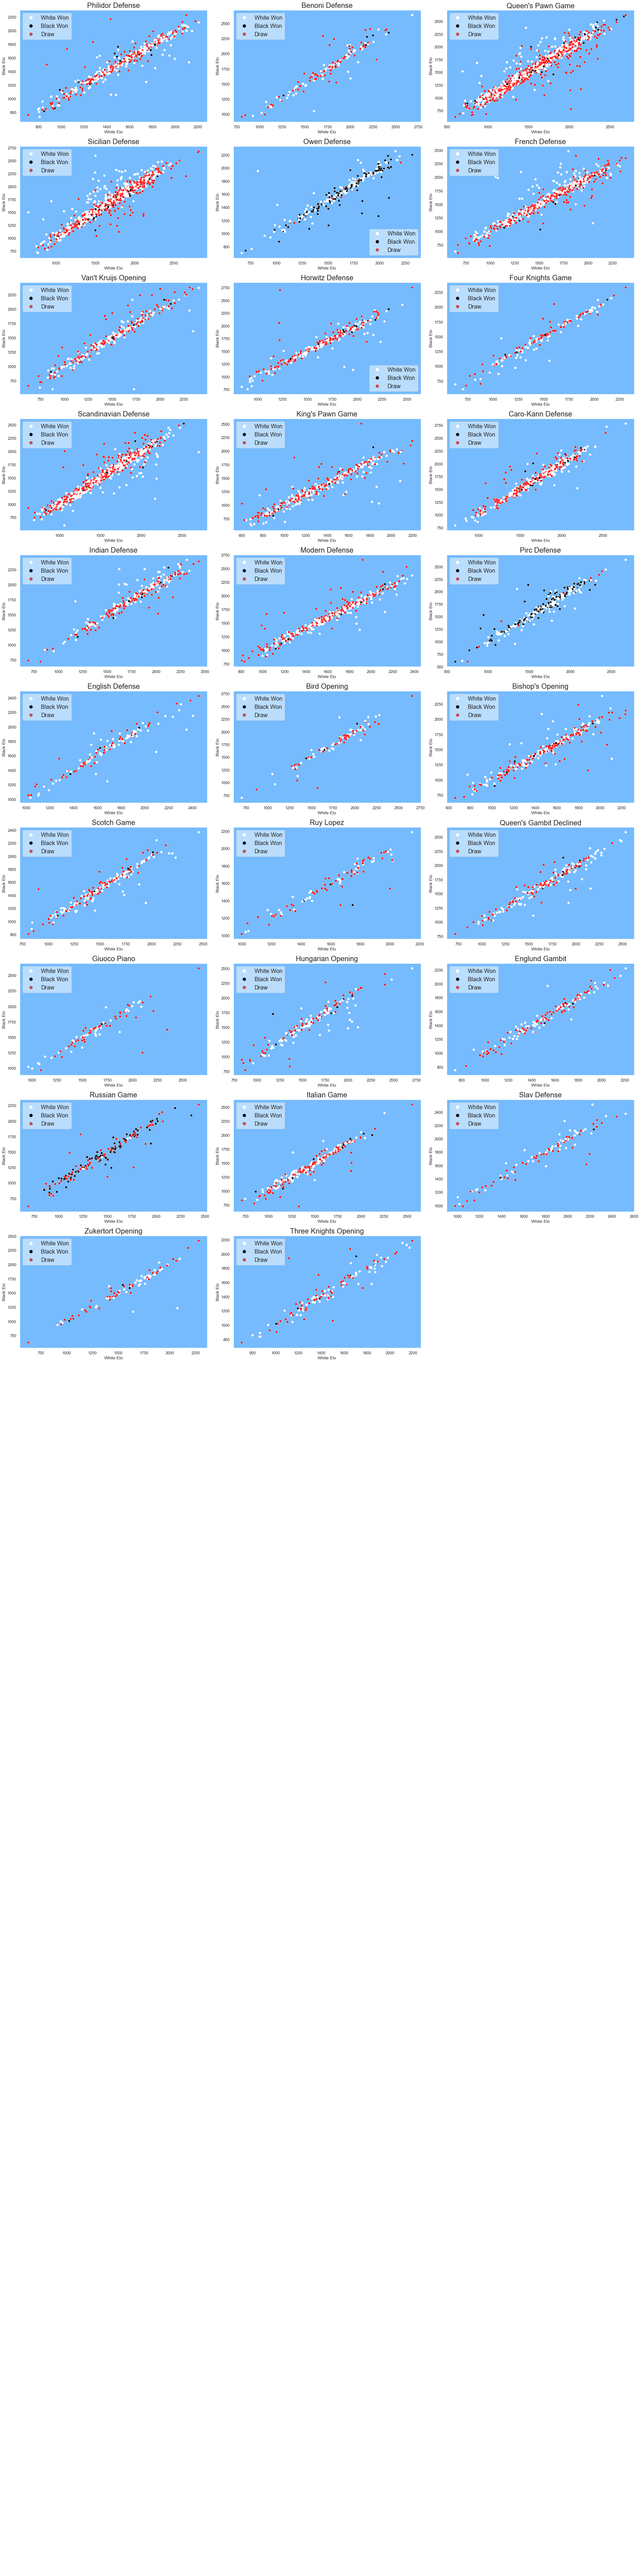

In [24]:
# Get the unique values of Opening
openings = df2['Opening'].unique()

# Create a subplot for each value of Opening
fig, axes = plt.subplots(nrows=19, ncols=3, figsize=(25, 100))

axes = axes.flatten()


# Create a scatterplot for each value of Opening
for i, opening in enumerate(openings):
    # Filter the dataframe to only include rows with the current value of Opening
    opening_df = df2[df2['Opening'] == opening]
    
    # Create the scatterplot
    sns.scatterplot(ax=axes[i], data=opening_df, x='White Elo', y='Black Elo', hue='White Won', palette=['white', 'red', 'black'])
    axes[i].set_title(opening)
    axes[i].legend()
    
    gray_patch = Line2D([0], [0], marker='o', color='w', label='White Won', markersize=8, ls='')
    black_patch = Line2D([0], [0], marker='o', color='black', label='Black Won', markersize=8, ls='')
    red_patch = Line2D([0], [0], marker='o', color='r', label='Draw', markersize=8, ls='')
    
    axes[i].set_title(opening, fontsize=20)
    axes[i].legend(handles=[gray_patch, black_patch, red_patch], facecolor='white', framealpha=.5, fontsize=16)
    axes[i].grid(False)

# Hide any extra subplots that we didn't use
for j in range(i+1, len(axes)):
    axes[j].axis('off')
    
# Show the plots
plt.tight_layout()
plt.show()


In [25]:
df['Opening'].value_counts()

Queen's Pawn Game          2839932
Sicilian Defense           2630545
Scandinavian Defense       1896611
French Defense             1415045
Caro-Kann Defense          1007383
Modern Defense              979663
Philidor Defense            864312
King's Pawn Game            755786
Van't Kruijs Opening        625820
Horwitz Defense             595120
Pirc Defense                583125
Bishop's Opening            582688
Indian Defense              517131
Italian Game                500069
Owen Defense                483904
Queen's Gambit Declined     460421
Scotch Game                 438896
Russian Game                364200
Hungarian Opening           330540
Englund Gambit              270280
Four Knights Game           259711
Benoni Defense              247656
Three Knights Opening       247229
English Defense             220843
Ruy Lopez                   205465
Zukertort Opening           204633
Slav Defense                193121
Giuoco Piano                184024
Bird Opening        

In [26]:
df2['Elo Difference'] = df['White Elo'] - df['Black Elo']


In [27]:
df2['White Won'] = df['White Won'].astype(float)


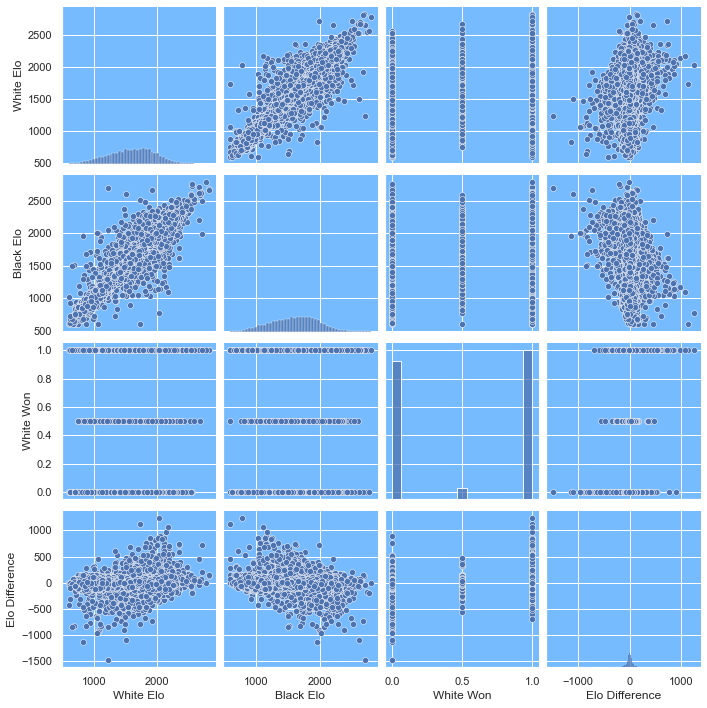

In [28]:
sns.pairplot(df2)

In [29]:
df['Termination'].value_counts()

Normal              15191089
Time forfeit         4875555
Abandoned              16928
Rules infraction         400
Name: Termination, dtype: int64

<AxesSubplot:xlabel='Black Elo'>

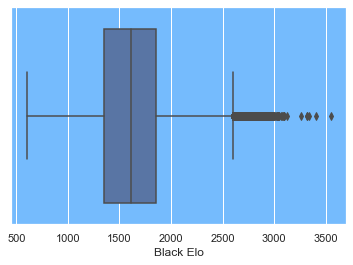

In [30]:

sns.boxplot(x='Black Elo', data=df)

<AxesSubplot:xlabel='White Elo'>

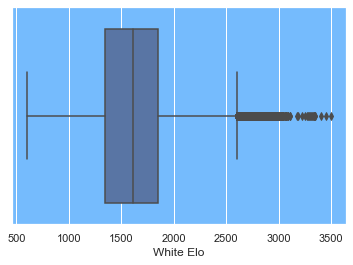

In [31]:
sns.boxplot(x='White Elo', data=df)

<AxesSubplot:>

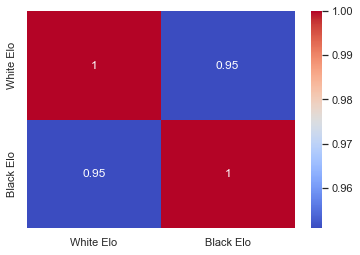

In [32]:
sns.scatterplot(x='White Elo', y='Black Elo', data=df)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:xlabel='White Elo', ylabel='Count'>

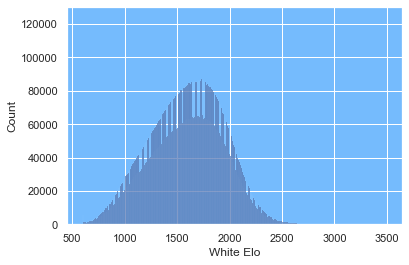

In [33]:
sns.histplot(x='White Elo', data=df)


<AxesSubplot:xlabel='Black Elo', ylabel='Density'>

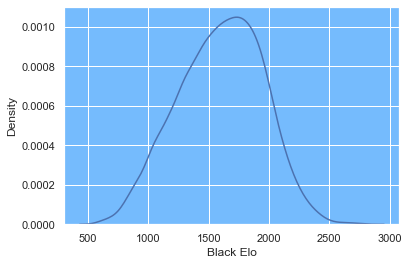

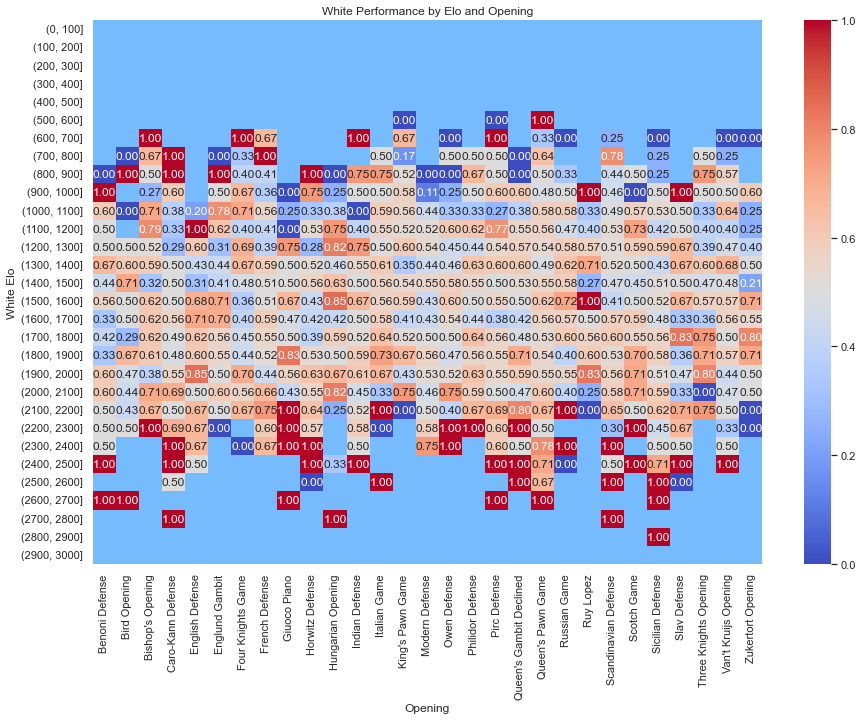

In [62]:
# Create bins for White Elo

elo_bins = range(0, 3100, 100)

# Group the data by White Elo and Opening and calculate the mean of White Won
grouped_data = df2.groupby([pd.cut(df2['White Elo'], elo_bins), 'Opening'])['White Won'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = grouped_data.pivot(index='White Elo', columns='Opening', values='White Won')

# Set the size of the heatmap
plt.figure(figsize=(15,10))

# Create the heatmap using seaborn
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')

# Add a title
plt.title('White Performance by Elo and Opening')

# Show the plot
plt.show()

<AxesSubplot:xlabel='Opening'>

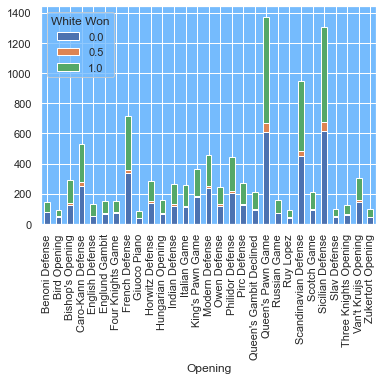

In [40]:
df2.groupby(['Opening', 'White Won']).size().unstack().plot(kind='bar', stacked=True)


In [41]:
# Check for missing values
print(df2.isna().sum())

# Check data types
print(df2.dtypes)



Event                         0
White Elo                     0
Black Elo                     0
White Won                     0
Termination                   0
Time Control                  0
Opening                       0
Opening Variation          5288
White First Move              0
Black First Move              0
Game URL                      0
Time Control: Increment       0
Elo Difference                0
dtype: int64
Event                       object
White Elo                    int64
Black Elo                    int64
White Won                  float64
Termination                 object
Time Control                object
Opening                     object
Opening Variation           object
White First Move            object
Black First Move            object
Game URL                    object
Time Control: Increment     object
Elo Difference               int64
dtype: object


In [42]:
# Convert White Won column to boolean type
df2['White Won'] = df2['White Won'].astype(bool)

# Summary statistics for numerical columns
print(df2.describe())


          White Elo     Black Elo  Elo Difference
count  10000.000000  10000.000000    10000.000000
mean    1596.391200   1598.465800       -2.074600
std      351.430173    352.263229      113.085128
min      600.000000    600.000000    -1479.000000
25%     1350.000000   1349.000000      -31.000000
50%     1617.000000   1618.000000        0.000000
75%     1854.000000   1857.250000       28.250000
max     2815.000000   2785.000000     1238.000000


In [43]:

# Analyze distribution of White Won column
print(df2['White Won'].value_counts())
win_percentage = df2['White Won'].mean() * 100
print("Win percentage for white:", win_percentage)


True     5372
False    4628
Name: White Won, dtype: int64
Win percentage for white: 53.72


In [44]:

# Analyze distribution of openings used
white_openings = df2['Opening'].value_counts()
black_openings = df2['Opening'].value_counts()
total_games = df2.shape[0]
print("Top 10 Openings (Popularity):\n", white_openings.head(10))


Top 10 Openings (Popularity):
 Queen's Pawn Game       1373
Sicilian Defense        1308
Scandinavian Defense     948
French Defense           716
Caro-Kann Defense        528
Modern Defense           460
Philidor Defense         444
King's Pawn Game         367
Van't Kruijs Opening     307
Bishop's Opening         292
Name: Opening, dtype: int64


In [45]:

# Calculate win percentage by opening
openings = df2.groupby(['Opening'])
win_percentages = openings['White Won'].mean() * 100
print("Win percentage by Opening:\n", win_percentages)


Win percentage by Opening:
 Opening
Benoni Defense             48.648649
Bird Opening               51.578947
Bishop's Opening           56.164384
Caro-Kann Defense          52.083333
English Defense            60.902256
Englund Gambit             54.901961
Four Knights Game          53.289474
French Defense             53.212291
Giuoco Piano               55.056180
Horwitz Defense            50.354610
Hungarian Opening          60.126582
Indian Defense             55.094340
Italian Game               58.076923
King's Pawn Game           51.771117
Modern Defense             48.695652
Owen Defense               51.821862
Philidor Defense           54.279279
Pirc Defense               54.411765
Queen's Gambit Declined    55.660377
Queen's Pawn Game          55.790240
Russian Game               56.521739
Ruy Lopez                  56.989247
Scandinavian Defense       52.742616
Scotch Game                56.603774
Sicilian Defense           52.905199
Slav Defense               52.475248
Th

Overall win percentage for white: 53.72


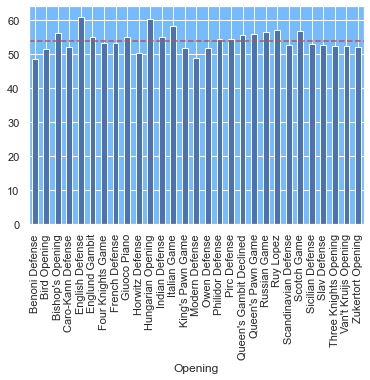

In [46]:

# Compare win percentage to overall win percentage
overall_win_percentage = df2['White Won'].mean() * 100
print("Overall win percentage for white:", overall_win_percentage)
win_percentages.plot(kind='bar')
plt.axhline(y=overall_win_percentage, color='r', linestyle='--')
plt.show()


In [47]:
win_percentages_sorted = win_percentages.sort_values(ascending=False)
win_percentages_sorted

Opening
English Defense            60.902256
Hungarian Opening          60.126582
Italian Game               58.076923
Ruy Lopez                  56.989247
Scotch Game                56.603774
Russian Game               56.521739
Bishop's Opening           56.164384
Queen's Pawn Game          55.790240
Queen's Gambit Declined    55.660377
Indian Defense             55.094340
Giuoco Piano               55.056180
Englund Gambit             54.901961
Pirc Defense               54.411765
Philidor Defense           54.279279
Four Knights Game          53.289474
French Defense             53.212291
Sicilian Defense           52.905199
Scandinavian Defense       52.742616
Slav Defense               52.475248
Van't Kruijs Opening       52.442997
Three Knights Opening      52.343750
Zukertort Opening          52.083333
Caro-Kann Defense          52.083333
Owen Defense               51.821862
King's Pawn Game           51.771117
Bird Opening               51.578947
Horwitz Defense            50.

In [48]:
# Calculate win percentage by opening and White Elo
df2['Win Percentage'] = df2.groupby(['Opening', 'White Elo'])['White Won']

# Aggregate by opening and White Elo to get the average win percentage
opening_ratings = df2.groupby(['Opening', 'White Elo'])['Win Percentage']

# Find the opening with the highest average win percentage for each White Elo rating
best_openings = opening_ratings.loc[opening_ratings.groupby('White Elo')['Win Percentage'].idxmax()]

# Plot the best opening for each White Elo rating
best_openings.plot(kind='scatter', x='White Elo', y='Win Percentage')
plt.xlabel('White Elo')
plt.ylabel('Win Percentage')
plt.title('Best Chess Opening as a Function of White Elo')
plt.show()

ValueError: Length of values (7884) does not match length of index (10000)